<a href="https://colab.research.google.com/github/yimingm/MSSP608-Practical-Machine-Learning/blob/master/Homework7_Fairness_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 7

For this assignment we will be working with a dataset of 1,267 patient records at a Korean hospital’s emergency department. The dataset you’ll receive contains 18 variables. You will use five of them:


Two protected attributes: 
   - `Age`
   - `Sex`

Two measures of the patient’s triage level, from 1 (highest emergency) to 5 (non-urgent).
   - `Nurse Triage` was reported by a nurse in real time at the hospital.
   - `Expert Triage` was evaluated by a team of two experts looking at the case history retrospectively.

One final measure of the patient’s final outcome
   - `Discharge` patients were sent home after their visit.
   - The other options all involve more serious outcomes of some kind: `Admission` to the hospital, `Transfer` to a different facility, `Surgery` or `Death`.


In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=13r36hDGjphjiKHVb6kpkAiqmmFeg6TAM' -O triage.csv

--2020-05-07 20:47:21--  https://docs.google.com/uc?export=download&id=13r36hDGjphjiKHVb6kpkAiqmmFeg6TAM
Resolving docs.google.com (docs.google.com)... 172.217.204.102, 172.217.204.101, 172.217.204.139, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ctjbfhoiiluclnnel3eg7d1ucfa8nr5c/1588884375000/09640029349513786515/*/13r36hDGjphjiKHVb6kpkAiqmmFeg6TAM?e=download [following]
--2020-05-07 20:47:22--  https://doc-14-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ctjbfhoiiluclnnel3eg7d1ucfa8nr5c/1588884375000/09640029349513786515/*/13r36hDGjphjiKHVb6kpkAiqmmFeg6TAM?e=download
Resolving doc-14-b0-docs.googleusercontent.com (doc-14-b0-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-14-b0-docs.googleusercontent.com (doc-14

In [ ]:
import pandas as pd
df = pd.read_csv("triage.csv")


## Task 1 *(4 points)*

Define four new binary variables `Nurse High-Risk`, `Expert High-Risk`, `Age Group`, and `Discharged`
   - A patient is defined as `High-Risk` if their triage score is 1-3.
   - `Age Group` should be a binary variable. Choose the cutoff threshold based on your inspection of the data.
   - `Discharged` should have a value of True if the patient was immediately discharged, and False otherwise.


In [ ]:
# Transform traige features to binary
# Delete space in feature name for convenience

df["Nurse_High_Risk"] = df["Nurse Triage"] < 4
df["Expert_High_Risk"] = df["Expert Triage"] < 4
df["Nurse_Triage"] = df["Nurse Triage"]
df["Expert_Triage"] = df["Expert Triage"]

In [ ]:
# Transform Age Group to binary
# First, find the mean of age as the divide threshold
print(df["Age"].describe())

# Create a new column for Age group
def Age_Group(x):
    if x > 54:
        return "Old"
    else:
        return "Young"
    
df["Age_Group"] = df["Age"].apply(Age_Group)
print(df["Age_Group"].value_counts())

count    1267.000000
mean       54.423836
std        19.725033
min        16.000000
25%        37.000000
50%        57.000000
75%        71.000000
max        96.000000
Name: Age, dtype: float64
Old      678
Young    589
Name: Age_Group, dtype: int64


In [ ]:
# Transform Discharged to binary
# Create a new column for Discharged
def discharged(x):
    if x == "Discharge":
        return "True"
    else:
        return "False"
    
df["Discharged"] = df["Disposition"].apply(discharged)

# Check the distribution of the weather data and preview the dataframe
print(df["Discharged"].value_counts())
df.head()

True     823
False    444
Name: Discharged, dtype: int64


,Age,Sex,Arrival mode,Complaint,Diagnosis,Injury,Alertness,Pain,Pain Scale,Systolic BP,Diastolic BP,Heart Rate,Respiratory Rate,Temperature,Oxygen Saturation,Nurse Triage,Expert Triage,Disposition,Nurse_High_Risk,Expert_High_Risk,Nurse_Triage,Expert_Triage,Age_Group,Discharged
0,71,Male,Car,right ocular pain,Corneal abrasion,Injury,Awake,Pain,2.0,160,100,84,18,36.6,100,2,4,Discharge,True,False,2,4,Old,True
1,56,Female,Car,right forearm burn,"Burn of hand, firts degree dorsum",Injury,Awake,Pain,2.0,137,75,60,20,36.5,NaN,4,5,Discharge,False,False,4,5,Old,True
2,68,Female,Ambulance,"arm pain, Lt","Fracture of surgical neck of humerus, closed",Injury,Awake,Pain,2.0,130,80,102,20,36.6,98,4,5,Admission,False,False,4,5,Old,False
3,71,Male,Walking,ascites tapping,Alcoholic liver cirrhosis with ascites,Non-Injury,Awake,Pain,3.0,139,94,88,20,36.5,NaN,4,5,Discharge,False,False,4,5,Old,True
4,58,Male,Car,"distension, abd",Ascites,Non-Injury,Awake,Pain,3.0,91,67,93,18,36.5,NaN,4,5,Discharge,False,False,4,5,Old,True


## Task 2 *(4 points)*

Using nurse triage scores, calculate baseline distributions of triage scores in this dataset. Also calculate baseline distributions of discharge rates. Then, calculate those distributions divided by age group and sex. 

Do triage scores and discharge rates differ in the population based on age and sex?

1. From the charts we can see that nurse triage scores do not show much different between sex groups. The proportions of male and female are generally the same in score 1-5.

2. As for the relationship between nurse triage score and age, old people have higher proportion of high risk scores (1-3).

3. As for the relationship between discharge rate and sex, at score 1, which means the patient was diagnosed of very dangerous situation, the discharge rate of male is higher that female (0%). There is no significant different between discharge rates of male and female at other scores.

4. As for the relationship between discharge rate and age, the discharge rates of young people are higher than those of old people at all scores.



In [ ]:
# Calculate baseline distributions of nurse triage scores

print("Distribution of nurse triage scores")
print(df["Nurse Triage"].value_counts() / len(df))
print(df["Nurse Triage"].value_counts())
print()

Distribution of nurse triage scores
4    0.395422
3    0.352802
2    0.168903
5    0.068666
1    0.014207
Name: Nurse Triage, dtype: float64
4    501
3    447
2    214
5     87
1     18
Name: Nurse Triage, dtype: int64



Distribution of Nurse Triage Score by Gender
Male      661
Female    606
Name: Sex, dtype: int64



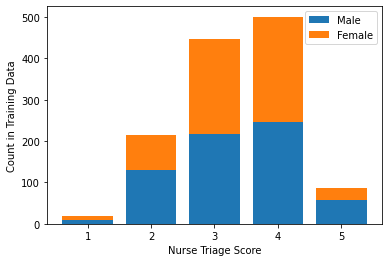

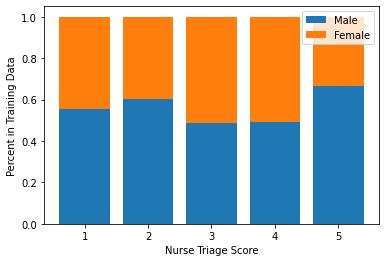

In [ ]:
# Calculate nurse triage scores distribution divided by gender
import matplotlib.pyplot as plt

# Prevalence of nurse triage scores
print("Distribution of Nurse Triage Score by Gender")
print(df.Sex.value_counts())
print()

Male = df.loc[df.Sex == "Male"]
Female = df.loc[df.Sex == "Female"]

plt.bar(range(1,6), Male.Nurse_Triage.value_counts(sort=False))
plt.bar(range(1,6), Female.Nurse_Triage.value_counts(sort=False), bottom=Male.Nurse_Triage.value_counts(sort=False))
plt.legend(["Male", "Female"])
plt.xlabel("Nurse Triage Score")
plt.ylabel("Count in Training Data")
plt.show()

male_pcts = Male.Nurse_Triage.value_counts(sort=False) / (Male.Nurse_Triage.value_counts(sort=False) + Female.Nurse_Triage.value_counts(sort=False))
female_pcts = Female.Nurse_Triage.value_counts(sort=False) / (Male.Nurse_Triage.value_counts(sort=False) + Female.Nurse_Triage.value_counts(sort=False))

plt.bar(range(1,6), male_pcts)
plt.bar(range(1,6), female_pcts, bottom=male_pcts)
plt.legend(["Male", "Female"])
plt.xlabel("Nurse Triage Score")
plt.ylabel("Percent in Training Data")
plt.show()

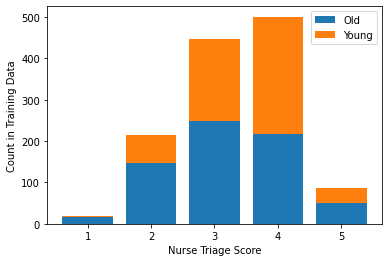

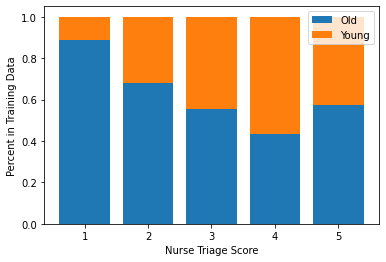

In [ ]:
# Calculate nurse triage scores distribution divided by age groups
Old = df.loc[df.Age_Group == "Old"]
Young = df.loc[df.Age_Group == "Young"]

plt.bar(range(1,6), Old.Nurse_Triage.value_counts(sort=False))
plt.bar(range(1,6), Young.Nurse_Triage.value_counts(sort=False), bottom=Old.Nurse_Triage.value_counts(sort=False))
plt.legend(["Old", "Young"])
plt.xlabel("Nurse Triage Score")
plt.ylabel("Count in Training Data")
plt.show()

old_pcts = Old.Nurse_Triage.value_counts(sort=False) / (Old.Nurse_Triage.value_counts(sort=False) + Young.Nurse_Triage.value_counts(sort=False))
young_pcts = Young.Nurse_Triage.value_counts(sort=False) / (Old.Nurse_Triage.value_counts(sort=False) + Young.Nurse_Triage.value_counts(sort=False))

plt.bar(range(1,6), old_pcts)
plt.bar(range(1,6), young_pcts, bottom=old_pcts)
plt.legend(["Old", "Young"])
plt.xlabel("Nurse Triage Score")
plt.ylabel("Percent in Training Data")
plt.show()

Distribution of Discharge Rate
True     0.649566
False    0.350434
Name: Discharged, dtype: float64


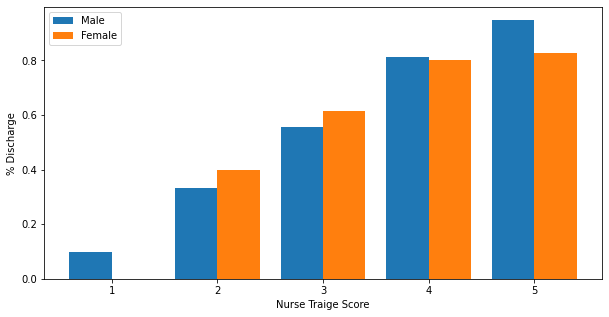

In [ ]:
# Calculate Discharge rates divided by gender
print("Distribution of Discharge Rate")
print(df.Discharged.value_counts() / len(df))

# calculate discharge rate by score
df.groupby(["Nurse_Triage"])["Discharged"].value_counts()

sex_probs = []
for sex in [Male, Female]:
    probs = []
    for score in range(1,6):
        subset = sex.loc[sex.Nurse_Triage == score]
        dis_rate = subset.loc[subset.Discharged=="True"]
        prob_dis = len(dis_rate) / len(subset)
        probs.append(prob_dis)
    sex_probs.append(probs)

fig = plt.gcf()
fig.set_size_inches(10,5)
plt.bar(range(1,6), sex_probs[0], align='edge', width=-.4)
plt.bar(range(1,6), sex_probs[1], align='edge', width=.4)
plt.xlabel("Nurse Traige Score")
plt.xticks(ticks=range(1,6), labels=range(1,6))
plt.ylabel("% Discharge")
plt.legend(["Male", "Female"])
plt.show()


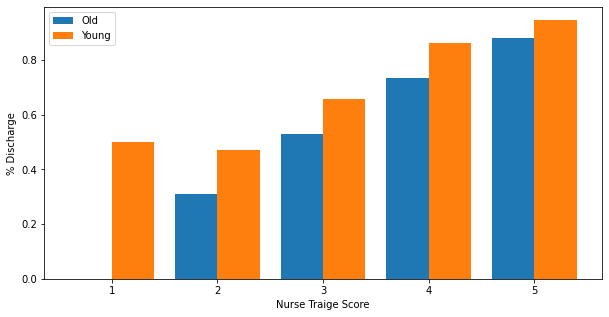

In [ ]:
# Calculate Discharge rates divided by age

age_probs = []
for age in [Old, Young]:
    probs = []
    for score in range(1,6):
        subset = age.loc[age.Nurse_Triage == score]
        dis_rate = subset.loc[subset.Discharged=="True"]
        prob_dis = len(dis_rate) / len(subset)
        probs.append(prob_dis)
    age_probs.append(probs)

fig = plt.gcf()
fig.set_size_inches(10,5)
plt.bar(range(1,6), age_probs[0], align='edge', width=-.4)
plt.bar(range(1,6), age_probs[1], align='edge', width=.4)
plt.xlabel("Nurse Traige Score")
plt.xticks(ticks=range(1,6), labels=range(1,6))
plt.ylabel("% Discharge")
plt.legend(["Old", "Young"])
plt.show()


## Task 3 *(8 points)*

Let's define a “predicted positive” case as any patient with a high-risk triage rating, and a “true positive” case as any patient that was **NOT** immediately discharged. 

Using nurse triage scores: 
   - Calculate the false positive rate and false negative rate for the population as a whole
   - Then calculate FPR and FNR for subgroups divided by age group and sex. 

How do false positive and false negative rates differ for subgroups? Are there any group fairness concerns that you see? It is okay if you do or do not see any concerns; either way, you should give specific quantitative evidence for your answer.
1. FPR is higher in old population than young population. FNR is higher in young population than old population.

2. Both FPR and FNR are slightly higher in female than male.

3. The difference between age groups are resonable. The diagnosis should be more careful for elder people, which means higher FPR is actually not a good sign for elder people. 

4. I don't see a good reason to explain the difference between sex groups. Indeed, the difference is not significant.




Definitions:

   - False Positive: The patient was diagnosed of high risk, given score 1-3 by nurse, but actually was discharged. (`Nurse High-Risk`True, `Discharged` True)

   - False Negative: The patient was diagnosed low risk by the nurse, given score 4-5, but in fact was not discharged.  (`Nurse High-Risk`False, `Discharged` False)

   - True Negative: The patient was dianosed low risk and was discharged.(`Nurse High-Risk`False, `Discharged` True)

   - True Positive: The patient was dianosed high risk and was not discharged.(`Nurse High-Risk`True, `Discharged` False)

In [ ]:
# Generating confusion matrix with scikit-learn
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = pd.crosstab(df['Discharged'], df['Nurse_High_Risk'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  False  True 
Actual                 
False        105    339
True         483    340


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


    In Total population:

    False Positive Rate = FP/FP+TN = 340/(340+483) = 41.31%

    False Negative Rate = FN/FN+TP = 105/(105+339) = 23.65%

In [ ]:
# confusion matrix of two age groups
confusion_matrix = pd.crosstab(Young['Discharged'], Young['Nurse_High_Risk'], rownames=['Actual'], colnames=['Predicted'])
print("Confusion matrix of Young:")
print (confusion_matrix)
print()

confusion_matrix = pd.crosstab(Old['Discharged'], Old['Nurse_High_Risk'], rownames=['Actual'], colnames=['Predicted'])
print("Confusion matrix of Old:")
print (confusion_matrix)

Confusion matrix of Young:
Predicted  False  True 
Actual                 
False         41    105
True         279    164

Confusion matrix of Old:
Predicted  False  True 
Actual                 
False         64    234
True         204    176


    In Young population:

    False Positive Rate = FP/FP+TN = 164/(164+279) = 37.02%

    False Negative Rate = FN/FN+TP = 41/(41+105) = 28.08%

    In Old population:

    False Positive Rate = FP/FP+TN = 176/(176+204) = 46.32%

    False Negative Rate = FN/FN+TP = 64/(64+234) = 21.48%

In [ ]:
# confusion matrix by sex
confusion_matrix = pd.crosstab(Male['Discharged'], Male['Nurse_High_Risk'], rownames=['Actual'], colnames=['Predicted'])
print("Confusion matrix of Male:")
print (confusion_matrix)
print()

confusion_matrix = pd.crosstab(Female['Discharged'], Female['Nurse_High_Risk'], rownames=['Actual'], colnames=['Predicted'])
print("Confusion matrix of Female:")
print (confusion_matrix)

Confusion matrix of Male:
Predicted  False  True 
Actual                 
False         49    192
True         255    165

Confusion matrix of Female:
Predicted  False  True 
Actual                 
False         56    147
True         228    175


    In Male:

    False Positive Rate = FP/FP+TN = 165/(165+255) = 39.29%

    False Negative Rate = FN/FN+TP = 49/(49+192) = 20.33%

    In Female:

    False Positive Rate = FP/FP+TN = 175/(175+228) = 43.42%

    False Negative Rate = FN/FN+TP = 56/(56+147) = 27.59%

## Task 4. *(8 points)*

Repeat tasks 2 and 3 using expert triage ratings instead of nurse triage ratings. 
   - Are retrospective expert ratings more or less accurate than nurse scores? 
   
   Based on the FPR and FNR of total population, age groups and sex groups, experts have higher FPR but lower FNR, which means that experts tend to overrate patients' situations. For example, by the diagnosis of experts, more patients with mild situation are considered dangerous, less high risk patients are considered safe. Although this extra carefulness is not harmful for patients, experts are not overall more accurate than nurses.
   - Are experts more or less fair than nurses, or about the same, by age and sex?

   Experts and nurses share similar fairness towards diagnosis of each population groups. They both show no bias toward sex groups and extra carefulness for old people indicating by overall lower discharge rates.




In [ ]:
# Calculate baseline distributions of expert triage scores

print("Distribution of expert triage scores")
print(df["Expert_Triage"].value_counts() / len(df))
print(df["Expert_Triage"].value_counts())
print()

Distribution of expert triage scores
3    0.384373
4    0.362273
2    0.173639
5    0.059195
1    0.020521
Name: Expert_Triage, dtype: float64
3    487
4    459
2    220
5     75
1     26
Name: Expert_Triage, dtype: int64



Distribution of Expert Triage Score by Gender
Male      661
Female    606
Name: Sex, dtype: int64



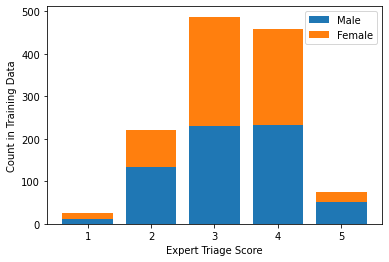

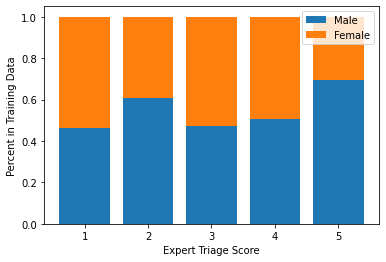

In [ ]:
# Calculate expert triage scores distribution divided by gender
import matplotlib.pyplot as plt

# Prevalence of expert triage scores
print("Distribution of Expert Triage Score by Gender")
print(df.Sex.value_counts())
print()

Male = df.loc[df.Sex == "Male"]
Female = df.loc[df.Sex == "Female"]

plt.bar(range(1,6), Male.Expert_Triage.value_counts(sort=False))
plt.bar(range(1,6), Female.Expert_Triage.value_counts(sort=False), bottom=Male.Expert_Triage.value_counts(sort=False))
plt.legend(["Male", "Female"])
plt.xlabel("Expert Triage Score")
plt.ylabel("Count in Training Data")
plt.show()

male_pcts = Male.Expert_Triage.value_counts(sort=False) / (Male.Expert_Triage.value_counts(sort=False) + Female.Expert_Triage.value_counts(sort=False))
female_pcts = Female.Expert_Triage.value_counts(sort=False) / (Male.Expert_Triage.value_counts(sort=False) + Female.Expert_Triage.value_counts(sort=False))

plt.bar(range(1,6), male_pcts)
plt.bar(range(1,6), female_pcts, bottom=male_pcts)
plt.legend(["Male", "Female"])
plt.xlabel("Expert Triage Score")
plt.ylabel("Percent in Training Data")
plt.show()

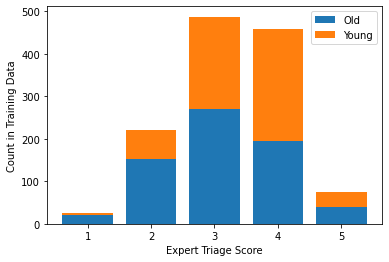

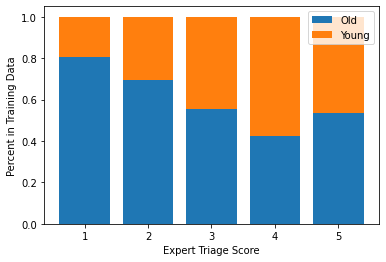

In [ ]:
# Calculate expert triage scores distribution divided by age groups

plt.bar(range(1,6), Old.Expert_Triage.value_counts(sort=False))
plt.bar(range(1,6), Young.Expert_Triage.value_counts(sort=False), bottom=Old.Expert_Triage.value_counts(sort=False))
plt.legend(["Old", "Young"])
plt.xlabel("Expert Triage Score")
plt.ylabel("Count in Training Data")
plt.show()

old_pcts = Old.Expert_Triage.value_counts(sort=False) / (Old.Expert_Triage.value_counts(sort=False) + Young.Expert_Triage.value_counts(sort=False))
young_pcts = Young.Expert_Triage.value_counts(sort=False) / (Old.Expert_Triage.value_counts(sort=False) + Young.Expert_Triage.value_counts(sort=False))

plt.bar(range(1,6), old_pcts)
plt.bar(range(1,6), young_pcts, bottom=old_pcts)
plt.legend(["Old", "Young"])
plt.xlabel("Expert Triage Score")
plt.ylabel("Percent in Training Data")
plt.show()

Distribution of Discharge Rate
True     0.649566
False    0.350434
Name: Discharged, dtype: float64


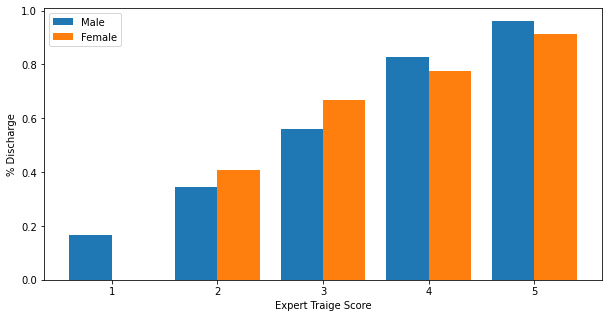

In [ ]:
# Calculate Discharge rates divided by gender
print("Distribution of Discharge Rate")
print(df.Discharged.value_counts() / len(df))

# calculate discharge rate by score
df.groupby(["Expert_Triage"])["Discharged"].value_counts()

sex_probs = []
for sex in [Male, Female]:
    probs = []
    for score in range(1,6):
        subset = sex.loc[sex.Expert_Triage == score]
        dis_rate = subset.loc[subset.Discharged=="True"]
        prob_dis = len(dis_rate) / len(subset)
        probs.append(prob_dis)
    sex_probs.append(probs)

fig = plt.gcf()
fig.set_size_inches(10,5)
plt.bar(range(1,6), sex_probs[0], align='edge', width=-.4)
plt.bar(range(1,6), sex_probs[1], align='edge', width=.4)
plt.xlabel("Expert Traige Score")
plt.xticks(ticks=range(1,6), labels=range(1,6))
plt.ylabel("% Discharge")
plt.legend(["Male", "Female"])
plt.show()

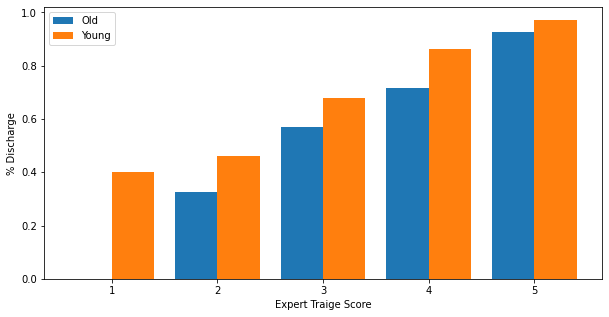

In [ ]:
# Calculate Discharge rates divided by age

age_probs = []
for age in [Old, Young]:
    probs = []
    for score in range(1,6):
        subset = age.loc[age.Expert_Triage == score]
        dis_rate = subset.loc[subset.Discharged=="True"]
        prob_dis = len(dis_rate) / len(subset)
        probs.append(prob_dis)
    age_probs.append(probs)

fig = plt.gcf()
fig.set_size_inches(10,5)
plt.bar(range(1,6), age_probs[0], align='edge', width=-.4)
plt.bar(range(1,6), age_probs[1], align='edge', width=.4)
plt.xlabel("Expert Traige Score")
plt.xticks(ticks=range(1,6), labels=range(1,6))
plt.ylabel("% Discharge")
plt.legend(["Old", "Young"])
plt.show()


Definitions:

   - False Positive: The patient was diagnosed of high risk, given score 1-3 by expert, but actually was discharged. (`Expert High-Risk`True, `Discharged` True)

   - False Negative: The patient was diagnosed low risk by the expert, given score 4-5, but in fact was not discharged.  (`Expert High-Risk`False, `Discharged` False)

   - True Negative: The patient was dianosed low risk and was discharged.(`Expert High-Risk`False, `Discharged` True)

   - True Positive: The patient was dianosed high risk and was not discharged.(`Expert High-Risk`True, `Discharged` False)

In [ ]:
# Generating confusion matrix with scikit-learn
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = pd.crosstab(df['Discharged'], df['Expert_High_Risk'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  False  True 
Actual                 
False         95    349
True         439    384


    In Total population:

    False Positive Rate = FP/FP+TN = 384/(384+439) = 46.66%

    False Negative Rate = FN/FN+TP = 95/(95+349) = 21.40%

In [ ]:
# confusion matrix of two age groups
confusion_matrix = pd.crosstab(Young['Discharged'], Young['Expert_High_Risk'], rownames=['Actual'], colnames=['Predicted'])
print("Confusion matrix of Young:")
print (confusion_matrix)
print()

confusion_matrix = pd.crosstab(Old['Discharged'], Old['Expert_High_Risk'], rownames=['Actual'], colnames=['Predicted'])
print("Confusion matrix of Old:")
print (confusion_matrix)

Confusion matrix of Young:
Predicted  False  True 
Actual                 
False         37    109
True         263    180

Confusion matrix of Old:
Predicted  False  True 
Actual                 
False         58    240
True         176    204


    In Young population:

    False Positive Rate = FP/FP+TN = 180/(180+263) = 40.63%

    False Negative Rate = FN/FN+TP = 37/(37+109) = 25.34%

    In Old population:

    False Positive Rate = FP/FP+TN = 204/(204+176) = 53.68%

    False Negative Rate = FN/FN+TP = 58/(58+240) = 19.46%

In [ ]:
# confusion matrix by sex
confusion_matrix = pd.crosstab(Male['Discharged'], Male['Expert_High_Risk'], rownames=['Actual'], colnames=['Predicted'])
print("Confusion matrix of Male:")
print (confusion_matrix)
print()

confusion_matrix = pd.crosstab(Female['Discharged'], Female['Expert_High_Risk'], rownames=['Actual'], colnames=['Predicted'])
print("Confusion matrix of Female:")
print (confusion_matrix)

Confusion matrix of Male:
Predicted  False  True 
Actual                 
False         42    199
True         243    177

Confusion matrix of Female:
Predicted  False  True 
Actual                 
False         53    150
True         196    207


    In Male:

    False Positive Rate = FP/FP+TN = 177/(177+243) = 42.14%

    False Negative Rate = FN/FN+TP = 42/(42+199) = 17.43%

    In Female:

    False Positive Rate = FP/FP+TN = 207/(207+196) = 51.36%

    False Negative Rate = FN/FN+TP = 53/(53+150) = 26.11%